In [22]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory


In [23]:
directory_path = "../Data/"
folders = []
for i in os.listdir(directory_path) :
    folders.append(i)
print(folders)
count = 0 
for folder in os.listdir(directory_path) :
    directory_new_path = directory_path + folder 
    for file  in os.listdir(directory_new_path) :
        directory_new_path = directory_new_path  + "/" +  file  
        if  not file.endswith(('.png', '.jpg', '.jpeg', 'bmp')) :
            os.remove(directory_new_path)
            count +=1
print(count)
classes = {}
print("the total images in each class")
dataset_path = Path("../Data")
for i in folders  :
    classes[i] = len(list((dataset_path/i).glob("*")))
    print(i , " : "  ,len(list((dataset_path/i).glob("*"))))

['Benign', 'early Pre-B', 'Pre-B', 'Pro-B']
0
the total images in each class
Benign  :  512
early Pre-B  :  979
Pre-B  :  955
Pro-B  :  796


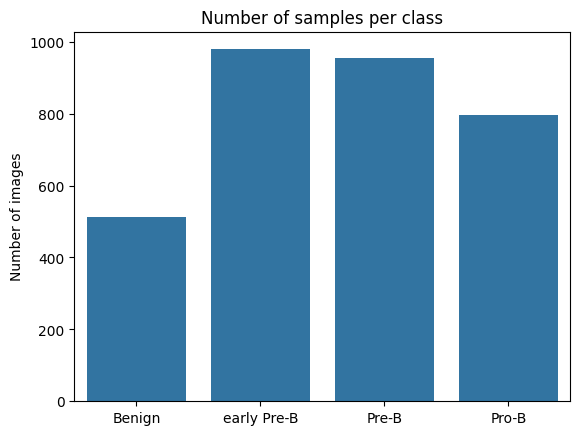

In [24]:
sns.barplot(x=list(classes.keys()), y=list(classes.values()))
plt.ylabel("Number of images")
plt.title("Number of samples per class")
plt.show()

In [ ]:
# import random
# import shutil
# from pathlib import Path
# import math

# src_root = Path("../Data")
# dest_root = Path("../Splited_Data")

# train_frac, val_frac, test_frac = 0.7, 0.15, 0.15
# random.seed(42)

#     if class_dir.is_dir():
#         imgs = list(class_dir.glob("*"))
#         random.shuffle(imgs)

#         n_total = len(imgs)
#         X_train = math.floor(n_total * train_frac)
#         X_val   = math.floor(n_total * val_frac)
#         X_test  = n_total - X_train - X_val

#         splits = {
#             "train": imgs[:X_train],
#             "val": imgs[X_train:X_train + X_val],
#             "test": imgs[X_train + X_val:]
#         }

#         for split, files in splits.items():
#             target_dir = dest_root / split / class_dir.name
#             target_dir.mkdir(parents=True, exist_ok=True)
#             for f in files:
#                 shutil.copy2(f, target_dir)

# print("✅ Done splitting all 4 classes!")


{'Benign': 512, 'early Pre-B': 979, 'Pre-B': 955, 'Pro-B': 796}
[WindowsPath('../Data/Benign/Sap_013 (1).jpg'), WindowsPath('../Data/Benign/Sap_013 (10).jpg'), WindowsPath('../Data/Benign/Sap_013 (11).jpg')]
[WindowsPath('../Data/early Pre-B/Sap_148 (1).jpg'), WindowsPath('../Data/early Pre-B/Sap_148 (10).jpg'), WindowsPath('../Data/early Pre-B/Sap_148 (100).jpg')]
[WindowsPath('../Data/Pre-B/Snapss_004.jpg'), WindowsPath('../Data/Pre-B/Snap_001.jpg'), WindowsPath('../Data/Pre-B/Snap_002 - Copy.jpg')]
[WindowsPath('../Data/Pro-B/Snap_001.jpg'), WindowsPath('../Data/Pro-B/Snap_002.jpg'), WindowsPath('../Data/Pro-B/Snap_003.jpg')]


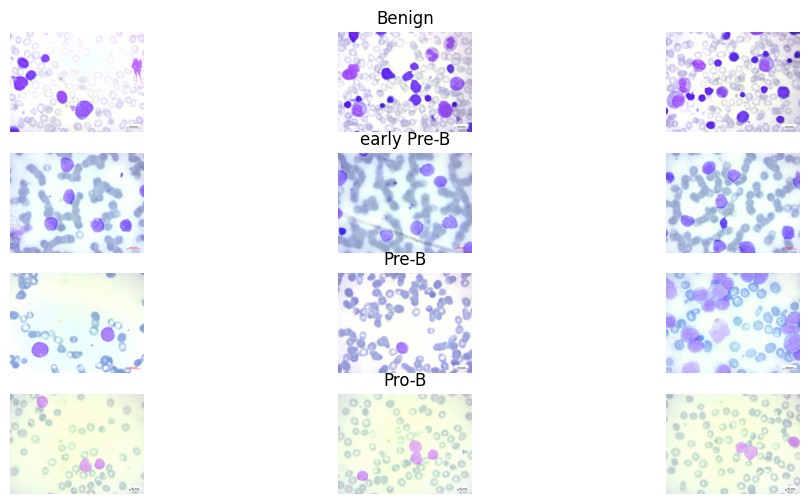

In [32]:
def show_samples(dataset_path, classes, n_samples=3):
    plt.figure(figsize=(12,6))
    print(classes)
    for idx, cls in enumerate(classes):
        imgs = list((dataset_path/cls).glob("*"))[:n_samples]
        print(imgs)
        for i, img_path in enumerate(imgs):
            plt.subplot(len(classes), n_samples, idx*n_samples + i + 1)
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis("off")
            if i == 1:
                plt.title(cls)
    plt.show()

show_samples(dataset_path, classes)


In [27]:
data_dir = "../Splited_Data"    
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [28]:
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=data_transforms['val'])
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=data_transforms['val'])

In [29]:

train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=data_transforms['train'])
val_dataset   = datasets.ImageFolder(root=f"{data_dir}/val", transform=data_transforms['val'])
test_dataset  = datasets.ImageFolder(root=f"{data_dir}/test", transform=data_transforms['val'])

In [30]:
print(train_dataset)

Dataset ImageFolder
    Number of datapoints: 2268
    Root location: ../Splited_Data/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [ ]:
splited_dire  = "../Splited_Data"
splited_data = {}
splited_dire = Path("../Splited_Data")
for folder in os.listdir(splited_dire) :
        if   folder.is_dir() :
                splited_data[i] = len(list((splited_data/folder).glob("*")))


AttributeError: 'str' object has no attribute 'is_dir'